## Potential Fields, Homework Assignment

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import re
from matplotlib import colors


#### 1. Gravity Fields

In [2]:
# The surface we are looking at is 100 km * 100 km

L=100*10**3 # [m]
Area = L**2 # [m^2]
thickness=4 # [m]
density_H2O = 1000 # [kg/m^3]

Ammount_of_water= Area * thickness
excess_mass=Ammount_of_water*density_H2O

G = 6.6743*10**(-11)  # [m3 s^(-2) kg^(-1)]

# Excessive gravitational attraction : at altitude 0, 500m and 500 km

# At 500m, infinite layer

g_0 = -2*np.pi*G*density_H2O*thickness
print(f'{g_0:0.3e} m.s^(-2)')
print('the gravitational attraction of an infinite layer is independent of the distance from the layer')


# At 500km point mass
r=500*10**3
g_500k = -G*excess_mass*r/(r**3)
print(f'{g_500k:0.3e} m.s^(-2)')

# At 0m gravity of a point in a medium
nabla_g=-4*np.pi*G/density_H2O
g=nabla_g*(1/L + 1/L + 1/thickness)**(-1)

print(f'{g:0.3e} m.s^(-2)')




-1.677e-06 m.s^(-2)
the gravitational attraction of an infinite layer is independent of the distance from the layer
-1.068e-08 m.s^(-2)
-3.355e-12 m.s^(-2)


#### 2. Solving the 2-D Laplace equation using Fourier method

In [3]:
R=6371*10**3 #[m]
azimuth = np.linspace(-np.pi,np.pi,360)


def Laplace_2D(little_r,lambda_v=azimuth,R=R):
    A_0=50
    A_n = np.array((2,20))
    n=np.array((2,10))

    V = A_0 + np.sum(A_n[i]*np.cos(n[i]*lambda_v)*((R/little_r)**n[i]) for i in range (0,len(A_n)))

    return V


<ipython-input-3-bbfe24427308>:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  V = A_0 + np.sum(A_n[i]*np.cos(n[i]*lambda_v)*((R/little_r)**n[i]) for i in range (0,len(A_n)))


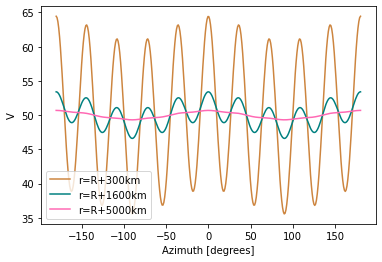

In [4]:
azy_plot=np.degrees(azimuth)
r_1=R+300*10**3
laplace_1 = Laplace_2D(r_1)

r_2=R+1600*10**3
laplace_2 = Laplace_2D(r_2)

r_3=R+5000*10**3
laplace_3 = Laplace_2D(r_3)

plt.figure()
plt.plot(azy_plot,laplace_1,color='peru',label='r=R+300km')
plt.plot(azy_plot,laplace_2,color='teal',label='r=R+1600km')
plt.plot(azy_plot,laplace_3,color='hotpink',label='r=R+5000km')
plt.legend()
plt.ylabel('V')
plt.xlabel('Azimuth [degrees]')
plt.show()



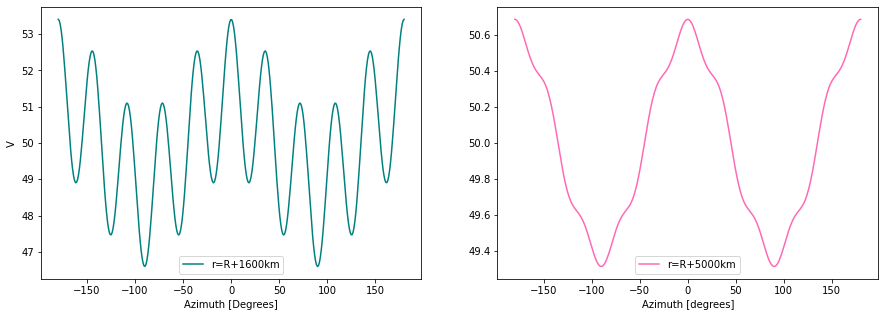

In [5]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(azy_plot,laplace_2,color='teal',label='r=R+1600km')
ax1.legend()
ax1.set_ylabel('V')
ax1.set_xlabel('Azimuth [Degrees]')
ax2.plot(azy_plot,laplace_3,color='hotpink',label='r=R+5000km')
ax2.legend()
ax2.set_xlabel('Azimuth [degrees]')
plt.show()

Reading input data
Computation of Fourier coefficients
_lambda= [-180. -176. -172. -168. -164. -160. -156. -152. -148. -144. -140. -136.
 -132. -128. -124. -120. -116. -112. -108. -104. -100.  -96.  -92.  -88.
  -84.  -80.  -76.  -72.  -68.  -64.  -60.  -56.  -52.  -48.  -44.  -40.
  -36.  -32.  -28.  -24.  -20.  -16.  -12.   -8.   -4.    0.    4.    8.
   12.   16.   20.   24.   28.   32.   36.   40.   44.   48.   52.   56.
   60.   64.   68.   72.   76.   80.   84.   88.   92.   96.  100.  104.
  108.  112.  116.  120.  124.  128.  132.  136.  140.  144.  148.  152.
  156.  160.  164.  168.  172.  176.  180.]
theta= [178. 174. 170. 166. 162. 158. 154. 150. 146. 142. 138. 134. 130. 126.
 122. 118. 114. 110. 106. 102.  98.  94.  90.  86.  82.  78.  74.  70.
  66.  62.  58.  54.  50.  46.  42.  38.  34.  30.  26.  22.  18.  14.
  10.   6.   2.]
Start of the computation of potential at the grid nodes
i= 0  (out of 45 )
i= 1  (out of 45 )
i= 2  (out of 45 )
i= 3  (out of 45 )
i= 4  (out o

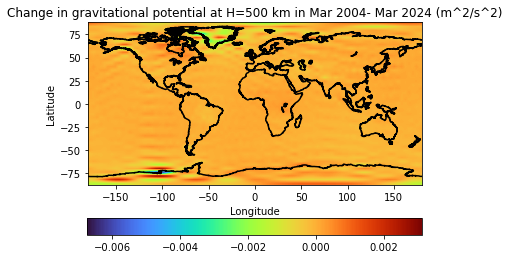

In [25]:

# function to compute normalized Legendre function
def plm(theta, degree):
    p_lm = np.zeros((degree + 1, degree + 1))
    u = np.sqrt(1 - np.cos(theta)**2)
    for l in range(degree +1):
        if l == 0:
            p_lm[l, l] = 1
        elif l == 1:
            p_lm[l, l] = u * np.sqrt(3)
        elif l > 1:
            p_lm[l, l] = u * np.sqrt((2*l + 1) / (2*l)) * p_lm[l-1, l-1]

    for l in range(degree + 1):
        for m in range(0, l+1):
            if m == l-1:
                if m == 0:
                    delta = 1
                else:
                    delta = 0
                a_lm = (2/np.sqrt(1+delta)) * ((m+1)/np.sqrt((l-m)*(l+m+1)))
                p_lm[l, m] = a_lm * (np.cos(theta)/u) * p_lm[l, m+1]

    for l in range(degree + 1):
        for m in range(l-2, 0 - 1, -1):
            if m == 0:
                delta = 1
            else:
                delta = 0
            a_lm = (2/np.sqrt(1+delta)) * ((m+1)/np.sqrt((l-m)*(l+m+1)))
            b_lm = (1 / np.sqrt(1 + delta)) * ((np.sqrt((l + m + 2) * (l - m - 1))) / (np.sqrt((l - m) * (l + m + 1))))
            p_lm[l, m] = a_lm * (np.cos(theta)/u) * p_lm[l, m + 1] - b_lm * p_lm[l, m+2]
    return p_lm

# function to read the Stokes coefficients
def readstrokescoefficients(filename):
    with open(filename) as f:
        reach_end_of_head = 0
        for line in f:
            line = line.strip()
            if reach_end_of_head == 0:
                if line.startswith("earth_gravity_constant"):
                    GM = float(line[line.index(" ") + 1:])
                elif "radius" in line:
                    line = re.sub(' +', ' ', line)
                    R = float(line.split(" ")[1])
                elif line.startswith("max_degree"):
                    line = re.sub(' +', ' ', line)
                    max_degree = int(line.split(" ")[1])
                    C = np.zeros((max_degree + 1, max_degree + 1))
                    S = np.zeros((max_degree + 1, max_degree + 1))
                else:
                    if line.startswith("end_of_head"):
                        reach_end_of_head = 1
            else:
                line = re.sub(' +', ' ', line)
                line = line.split()
                L = int(line[1])
                M = int(line[2])
                C[L, M] = float(line[3])
                S[L, M] = float(line[4])
    return C, S, R, GM


print ('Reading input data')
# March 2004 
C_beg, S_beg, R, GM = readstrokescoefficients("Data/CSR_CSR-Release-06_60x60_DDK4_kfilter_DDK4_GSM-2_2004061-2004091_GRAC_UTCSR_BA01_0600.gfc")

# September 2004
#C_end, S_end, R, GM = readstrokescoefficients("Data/CSR_CSR-Release-06_60x60_DDK4_kfilter_DDK4_GSM-2_2004245-2004274_GRAC_UTCSR_BA01_0600.gfc")

# March 2024
C_end, S_end, R, GM = readstrokescoefficients("Data/CSR_CSR-Release-06.3-GFO_60x60_DDK4_kfilter_DDK4_GSM-2_2024061-2024091_GRFO_UTCSR_BA01_0603.gfc")

# September 2024
#C_end, S_end, R, GM = readstrokescoefficients("Data/CSR_CSR-Release-06.3-GFO_60x60_DDK4_kfilter_DDK4_GSM-2_2024245-2024274_GRFO_UTCSR_BA01_0603.gfc")

# Compute the difference between the two solutions by subtracting
# the two sets of Stokes coefficients from each other
dclm = C_end - C_beg
dslm = S_end - S_beg

# define necessary constants
l = 60
m = 60

print ('Computation of Fourier coefficients')

# convert the resulting Stokes coefficients into the Fourier coefficients of gravitational potential.
C_dhw = np.zeros((l+1, l+1))
S_dhw = np.zeros((l+1, l+1))
for i in range(l+1):
    for j in range(i+1):
        multiplication_factor = GM/(R)
        C_dhw[i, j] = (dclm[i, j] * multiplication_factor)
        S_dhw[i, j] = (dslm[i, j] * multiplication_factor)

# define grid
#_lambda = np.pi/180 * np.array(range(359 + 1))
#theta = np.pi/180 * np.array(range(1, 179 + 1))
#_lambda = np.pi/180 * np.array(range(0,359 + 1,4)) - np.pi
_lambda = np.pi/180 * np.array(range(0,364,4)) - np.pi
theta = np.pi - np.pi/180 * np.array(range(2, 179 + 1,4))
print('_lambda=',_lambda/np.pi*180)
print('theta=',theta/np.pi*180)

# initialize the output grid
ewh = np.zeros((len(theta), len(_lambda)))
test = np.zeros((len(theta), len(_lambda)))

r_500=500

print ('Start of the computation of potential at the grid nodes')

# computational algorithm
for i in range(len(theta)):                              # loop over all thetas
    print ('i=',i,' (out of',len(theta),')')
    P_lm = plm(theta[i], l)                              # all Legendre Functions for one theta
    for j in range(len(_lambda)):                        # loop over all lambdas
        for k in range(l+1):                             # loop over all degrees
            for t in range(k+1):                         # loop over negative orders
                sin_t_lambda = np.sin(t*_lambda[j])      # negative orders
                cos_t_lambda = np.cos(t*_lambda[j])      # non-negative orders
                # compute here equivalent water heights
                ewh[i, j] = ewh[i, j] + (S_dhw[k, t] * P_lm[k, t] * sin_t_lambda) 
                ewh[i, j] = ewh[i, j] + (C_dhw[k, t] * P_lm[k, t] * cos_t_lambda) 
                ewh[i, j] = ewh[i, j] * ((R/(R+r_500))**(k+1))

            #test[i, j] = test[i, j] + ewh[i, j]*((R/(R+r_500))**(k+1))


lambda_min=-180
lambda_max=180
lat_min=-88
lat_max=88

# make plot

latitude = np.pi/2 - theta

fig1, ax1 = plt.subplots()
im1 = ax1.imshow(ewh, interpolation='bilinear', cmap=cm.turbo,
                origin='lower', extent=[lambda_min, lambda_max, lat_min, lat_max])


# Drawing the coastline
f = open("Data/coastline.txt", "r")
coastline_lat = []
coastline_lon = []
for line in f:
  line = line.strip()
  if line.startswith("#"):
    Dummy=0;
  elif line.startswith(">"):
    ax1.plot(coastline_lon,coastline_lat,color='k')
    coastline_lat = []
    coastline_lon = []
  else:
    line = re.sub(' +', ' ', line)
    line = line.split()
    lon = float(line[0])
    lat = float(line[1])
    coastline_lat.append(lat)
    coastline_lon.append(lon)
ax1.plot(coastline_lon,coastline_lat,color='k')
f.close();

ax1.set(title='Change in gravitational potential at H=500 km in Mar 2004- Mar 2024 (m^2/s^2)',xlabel='Longitude', ylabel='Latitude')
fig1.colorbar(im1, ax=ax1, orientation='horizontal', fraction=0.1)

fig1.savefig("V_altitude-0_20-yr(Mar2004-Mar2024) H=500km.pdf")
# fig1.savefig("V_altitude-0_20-yr.eps")
plt.show()

<ipython-input-3-bbfe24427308>:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  V = A_0 + np.sum(A_n[i]*np.cos(n[i]*lambda_v)*((R/little_r)**n[i]) for i in range (0,len(A_n)))
<ipython-input-3-bbfe24427308>:10: RuntimeWarning: divide by zero encountered in double_scalars
  V = A_0 + np.sum(A_n[i]*np.cos(n[i]*lambda_v)*((R/little_r)**n[i]) for i in range (0,len(A_n)))


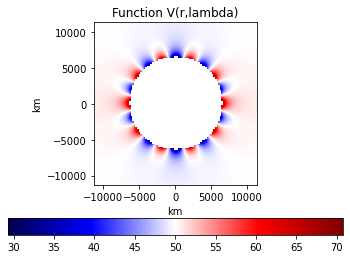

In [7]:


#Function to convert Cartesian to polar coordinate
def cart2pol(x, y):
    rho = np.sqrt(x ** 2 + y ** 2)
    phi = np.arctan2(y, x)
    return rho, phi

#Function to convert polar to Cartesian coordinates (inputs in degree)
def pol2cart(rho, phi):
    phi = np.deg2rad(phi)
    t = np.cos(phi)
    x = np.outer(rho, np.cos(phi))
    y = np.outer(rho, np.sin(phi))
    return x, y
 
#Input
Lambda = np.arange(-179.5, 179.5, 1) #degree
h = [0, 300, 1600, 5000]             #km
h = np.array(h)
R = 6371                             #km
r = R + h

nx = 101; ny = 101

#pol2cart
x, y = pol2cart(r, Lambda)
min_x = np.min(x)
max_x = np.max(x)
step_x = (max_x - min_x) / (nx-1)
min_y = np.min(y)
max_y = np.max(y)
step_y = (max_y - min_y) / (ny-1)

#define an equidistant grid
points_coords_x = np.zeros(nx)
for kx in range(nx):
  points_coords_x[kx] = min_x+kx*step_x
points_coords_y = np.zeros(ny)
for ky in range(ny):
  points_coords_y[ky] = min_y+ky*step_y

V = np.zeros((ny,nx))
for kx in range(nx):
  for ky in range(ny):
    x = points_coords_x[kx];
    y = points_coords_y[ky];
    r_new, lambda_new = cart2pol(x, y)

#compute V(r_new,lambda_new) using your function
    V [ky,kx] = Laplace_2D(r_new,lambda_new,R=R)

# Remove Earth interior
    if r_new<R:
       V [ky,kx] = float('nan')

# Making a plot
V_min = np.nanmin(V)
V_max = np.nanmax(V)
fig1, ax1 = plt.subplots()
im1 = ax1.imshow(V, interpolation='bilinear', cmap=cm.seismic,
               origin='lower', extent=[min_x, max_x, min_y, max_y],
               vmin=V_min, vmax=V_max)
ax1.set(title='Function V(r,lambda)',xlabel='km', ylabel='km')
fig1.colorbar(im1, ax=ax1, orientation='horizontal', fraction=0.1, label='')
fig1.savefig('plot.png')

plt.show()
